In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datasets import load_dataset

# -------------------------------
# 1️⃣ Load GoEmotions dataset
# -------------------------------
dataset = load_dataset("go_emotions", "raw")

In [2]:
# 2️⃣ Check available splits
print("Available splits:", list(dataset.keys()))

# 3️⃣ Convert existing splits to pandas safely
dfs = {}
for split in dataset.keys():
    dfs[split] = dataset[split].to_pandas()

# 4️⃣ Assign available dataframes
train_df = dfs.get("train")
val_df   = dfs.get("validation") or dfs.get("valid")  # handle different names
test_df  = dfs.get("test")

# Show shapes for confirmation
for name, df in dfs.items():
    print(f"{name} → {df.shape}")

# 5️⃣ Preview one of them
if train_df is not None:
    print(train_df.head())
else:
    print("⚠️ No train split found, please check dataset keys printed above.")

Available splits: ['train']
train → (211225, 37)
                                                text       id  \
0                                    That game hurt.  eew5j0j   
1   >sexuality shouldn’t be a grouping category I...  eemcysk   
2     You do right, if you don't care then fuck 'em!  ed2mah1   
3                                 Man I love reddit.  eeibobj   
4  [NAME] was nowhere near them, he was by the Fa...  eda6yn6   

                author            subreddit    link_id   parent_id  \
0                Brdd9                  nrl  t3_ajis4z  t1_eew18eq   
1          TheGreen888     unpopularopinion  t3_ai4q37   t3_ai4q37   
2             Labalool          confessions  t3_abru74  t1_ed2m7g7   
3        MrsRobertshaw             facepalm  t3_ahulml   t3_ahulml   
4  American_Fascist713  starwarsspeculation  t3_ackt2f  t1_eda65q2   

    created_utc  rater_id  example_very_unclear  admiration  ...  love  \
0  1.548381e+09         1                 False           0  ... 

In [3]:

# 1️⃣ Load the dataset
dataset = load_dataset("go_emotions", "raw")

print("Available splits:", list(dataset.keys()))

# 2️⃣ Convert all available splits to pandas
dfs = {split: dataset[split].to_pandas() for split in dataset.keys()}

# Choose main splits (some versions have only 'train')
train_df = dfs.get("train")
val_df   = dfs.get("validation") or dfs.get("valid")
test_df  = dfs.get("test")

for name, df in dfs.items():
    print(f"{name} → {df.shape}")

Available splits: ['train']
train → (211225, 37)


In [4]:
from datasets import load_dataset

dataset = load_dataset("go_emotions", "raw")
train_df = dataset['train'].to_pandas()

print("Columns in train_df:")
print(train_df.columns)
print("\nSample rows:")
print(train_df.head())

Columns in train_df:
Index(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
       'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

Sample rows:
                                                text       id  \
0                                    That game hurt.  eew5j0j   
1   >sexuality shouldn’t be a grouping category I...  eemcysk   
2     You do right, if you don't care then fuck 'em!  ed2mah1   
3                                 Man I love reddit.  eeibobj   
4  [NAME] was nowhere near them, he was by the Fa...  eda6yn6   

                author            subreddit    link_id   

In [5]:
# STEP 4: Simplify 27 one-hot columns → 7 main emotions
# -----------------------------

import pandas as pd

# List of 7 main categories
main_emotions = ['joy','sadness','anger','fear','disgust','surprise','neutral']

# Mapping original columns to 7 main emotions
emotion_map = {
    'admiration':'joy', 'amusement':'joy', 'approval':'joy','joy':'joy','love':'joy',
    'optimism':'joy','relief':'joy','gratitude':'joy','pride':'joy','excitement':'joy',
    'anger':'anger', 'disgust':'disgust', 'fear':'fear', 'sadness':'sadness',
    'surprise':'surprise','neutral':'neutral'
}

def simplify_row(row):
    # Collect all original emotions that are 1 in this row
    active_emotions = [col for col in row.index if col in emotion_map and row[col]==1]
    if len(active_emotions) == 0:
        return 'neutral'
    elif len(active_emotions) > 1:
        return 'neutral'  # if multiple emotions active, mark as neutral
    else:
        return emotion_map[active_emotions[0]]

# Apply mapping to train, val, test
for df in [train_df, val_df, test_df]:
    if df is not None:
        df['emotion'] = df.apply(simplify_row, axis=1)

# Check results
print("Sample after mapping:")
print(train_df[['text','emotion']].sample(5))

Sample after mapping:
                                                     text  emotion
54785   I haven't been much on this sub recently. Is t...  neutral
163708  Yeah the only "compromise" is get married ASAP...  neutral
174889                             Because it’s more fun?  neutral
12229   I appreciate it! I spent a lot of time craftin...      joy
11726                             and I love him for that      joy


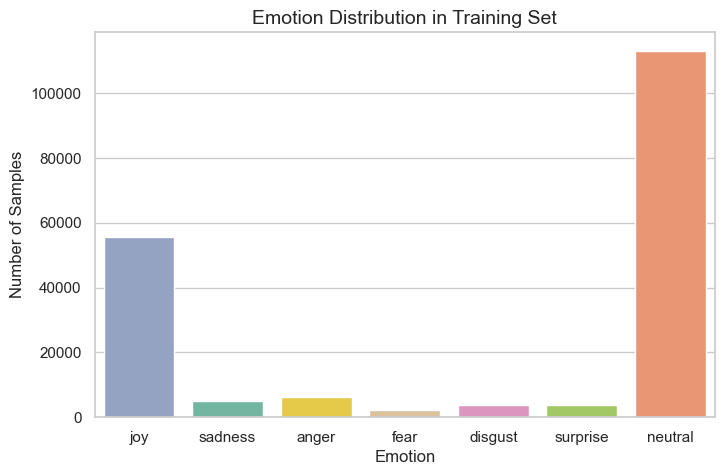

Counts per emotion in training set:
emotion
neutral     113162
joy          55580
anger         6300
sadness       5055
surprise      3908
disgust       3777
fear          2321
Name: count, dtype: int64


In [21]:


# --- ADD THIS LINE TO FIX WHITESPACE ISSUES ---
train_df.columns = train_df.columns.str.strip() 
# ---------------------------------------------

# STEP 5: Visualize Emotion Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot distribution of emotions in the training set
plt.figure(figsize=(8,5))
sns.countplot(x='emotion', data=train_df,
              hue='emotion', # Fixes the FutureWarning
              order=['joy','sadness','anger','fear','disgust','surprise','neutral'],
              palette="Set2" )

plt.title("Emotion Distribution in Training Set", fontsize=14)
plt.xlabel("Emotion", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.savefig("emotion_distribution.png",dpi=300,bbox_inches='tight')
plt.show()

# Optional: Print counts per class
print("Counts per emotion in training set:")
print(train_df['emotion'].value_counts())


In [8]:
# Use val_df if exists, else take 10% of train_df as validation
if val_df is not None:
    X_val = val_df['text']
    y_val = val_df['emotion']
else:
    val_df = train_df.sample(frac=0.1, random_state=42)
    train_df = train_df.drop(val_df.index)
    X_val = val_df['text']
    y_val = val_df['emotion']

# Train features
X_train = train_df['text']
y_train = train_df['emotion']
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)          # remove links
    text = re.sub(r"[^a-zA-Z\s]", "", text)      # remove punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip()
    words = [w for w in text.split() if w not in stop_words]
    return " ".join(words)

train_df['text_clean'] = train_df['text'].apply(clean_text)
val_df['text_clean'] = val_df['text'].apply(clean_text)

# Use cleaned text now
X_train = train_df['text_clean']
X_val   = val_df['text_clean']

# TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,3),sublinear_tf=True,stop_words='english')

X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

# Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.1, 1, 5, 10],
    'solver': ['saga', 'lbfgs'],
    'class_weight': ['balanced', None],
    'max_iter': [1000]
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=3, n_jobs=-1, scoring='f1_macro')
grid.fit(X_train_tfidf, y_train)

print("Best params found:", grid.best_params_)

best_lr = grid.best_estimator_

y_pred = best_lr.predict(X_val_tfidf)
#from sklearn.linear_model import LogisticRegression
#lr_model = LogisticRegression(max_iter=2000, class_weight='balanced',solver='saga')
#lr_model.fit(X_train_tfidf, y_train)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Best params found: {'C': 10, 'class_weight': None, 'max_iter': 1000, 'solver': 'lbfgs'}


Classification Report:

              precision    recall  f1-score   support

         joy       0.47      0.18      0.26       730
     sadness       0.39      0.13      0.20       424
       anger       0.49      0.27      0.35       240
        fear       0.60      0.44      0.51      6116
     disgust       0.68      0.84      0.75     12683
    surprise       0.39      0.15      0.22       505
     neutral       0.45      0.15      0.23       424

    accuracy                           0.65     21122
   macro avg       0.50      0.31      0.36     21122
weighted avg       0.63      0.65      0.62     21122



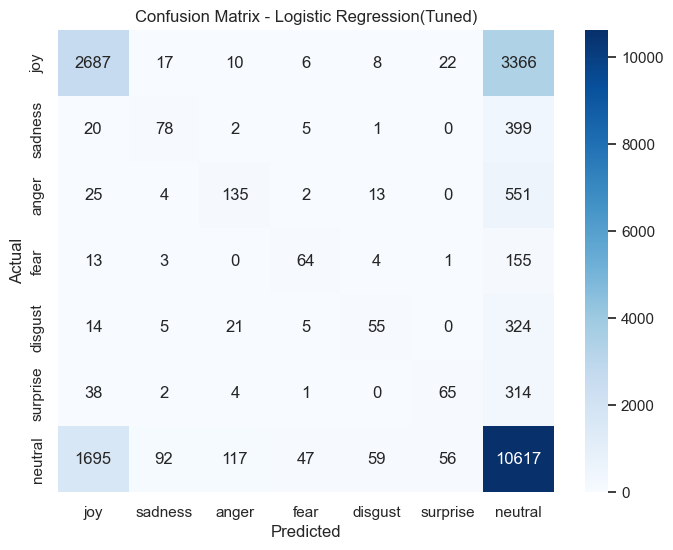

In [32]:
# 4️⃣ Predict and evaluate
# -----------------------------

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("Classification Report:\n")
print(classification_report(y_val, y_pred, target_names=['joy','sadness','anger','fear','disgust','surprise','neutral']))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=['joy','sadness','anger','fear','disgust','surprise','neutral'])
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['joy','sadness','anger','fear','disgust','surprise','neutral'],
            yticklabels=['joy','sadness','anger','fear','disgust','surprise','neutral'],
            cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression(Tuned)")
plt.savefig("confusion Matrix.png",dpi=300,bbox_inches='tight')
plt.show()

In [10]:
# Find misclassified examples
misclassified = X_val[y_val != y_pred]
actual_labels = y_val[y_val != y_pred]
pred_labels = y_pred[y_val != y_pred]

# Display first 5 misclassified samples
for text, actual, pred in zip(misclassified[:5], actual_labels[:5], pred_labels[:5]):
    print(f"Text: {text}")
    print(f"Actual: {actual}, Predicted: {pred}\n")

Text: nice saw demo pretty impressed
Actual: neutral, Predicted: joy

Text: funny ask
Actual: joy, Predicted: neutral

Text: pounces uwu youre warm
Actual: surprise, Predicted: neutral

Text: wow kinda lame true us probably dont know
Actual: surprise, Predicted: neutral

Text: assuming true frankly im surprised still allowed images name homes
Actual: neutral, Predicted: surprise



In [11]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score 
# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
# Predict
y_pred_nb = nb_model.predict(X_val_tfidf)

# Accuracy
print("Naive Bayes Accuracy:", accuracy_score(y_val, y_pred_nb))

Naive Bayes Accuracy: 0.6393333964586687


In [13]:
# Load model and vectorizer
import joblib
lr_model = joblib.load('emotion_lr_model.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')

# Predict new text
new_text = ["I am so happy today!"]
new_text_tfidf = tfidf.transform(new_text)
prediction = lr_model.predict(new_text_tfidf)
print("Predicted Emotion:", prediction)

Predicted Emotion: ['joy']


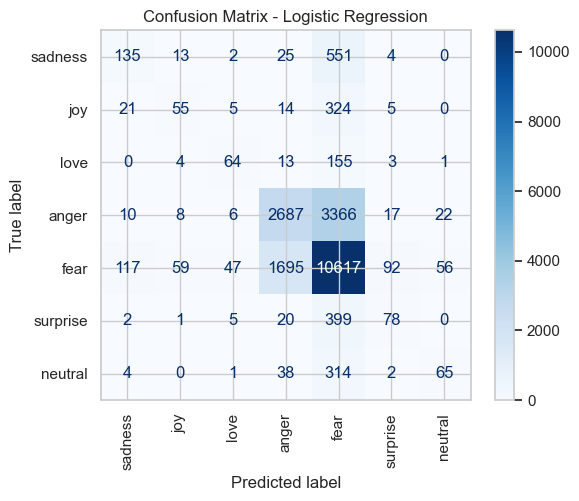

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['sadness','joy','love','anger','fear','surprise','neutral'])

# Plot it
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix - Logistic Regression")
plt.savefig("confusion_matrix_display.png",dpi=300,bbox_inches='tight')
plt.show()

In [17]:
# Example with Streamlit
!pip install streamlit
import streamlit as st

st.title("Emotion Detection AI")
user_text = st.text_input("Enter your text:")

if user_text:
    X_new = tfidf.transform([user_text])
    pred = lr_model.predict(X_new)[0]
    st.write(f"Predicted Emotion: {pred}")

2025-10-25 00:40:19.427 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-25 00:40:19.972 
  command:

    streamlit run C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-10-25 00:40:19.974 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-25 00:40:19.976 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-25 00:40:19.978 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-25 00:40:19.979 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-25 00:40:19.981 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-25 00:40:1

In [35]:
# 1️⃣ Imports
# -------------------------------
import joblib
import pandas as pd
import numpy as np
from IPython.display import display
import ipywidgets as widgets

# -------------------------------
# 2️⃣ Load saved model & vectorizer
# -------------------------------
lr_model = joblib.load('emotion_lr_model.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')

# Main emotions
emotions = ['joy','sadness','anger','fear','disgust','surprise','neutral']

# -------------------------------
# 3️⃣ Function to predict emotion
# -------------------------------
def predict_emotion(text):
    X_new = tfidf.transform([text])
    pred_emotion = lr_model.predict(X_new)[0]
    pred_prob = lr_model.predict_proba(X_new)[0]
    
    # Create a DataFrame for probabilities
    prob_df = pd.DataFrame({'Emotion': emotions, 'Probability': pred_prob})
    prob_df = prob_df.sort_values(by='Probability', ascending=False)
    
    # Top contributing words (TF-IDF)
    feature_names = np.array(tfidf.get_feature_names_out())
    top_n = 5
    top_indices = X_new.toarray()[0].argsort()[-top_n:][::-1]
    top_words = feature_names[top_indices]
    
    print(f"\nPredicted Emotion: {pred_emotion.upper()}")
    print("\nPrediction Confidence per Emotion:")
    display(prob_df)
    print("\nTop Words Influencing Prediction (TF-IDF):", top_words)

# -------------------------------
# 4️⃣ Create Jupyter Widget for Input
# -------------------------------
text_input = widgets.Textarea(
    value='',
    placeholder='Type your text here...',
    description='Input Text:',
    layout=widgets.Layout(width='80%', height='100px')
)

predict_button = widgets.Button(
    description='Predict Emotion',
    button_style='success'
)

output = widgets.Output()

# -------------------------------
# 5️⃣ Define button click behavior
# -------------------------------
def on_button_click(b):
    with output:
        output.clear_output()
        text = text_input.value
        if text.strip() != '':
            predict_emotion(text)
        else:
            print("Please enter some text!")

predict_button.on_click(on_button_click)

# -------------------------------
# 6️⃣ Display Widgets
# -------------------------------
import joblib
import pandas as pd
import numpy as np
from IPython.display import display
import ipywidgets as widgets

# Load model & vectorizer
lr_model = joblib.load('emotion_lr_model.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')
emotions = ['joy','sadness','anger','fear','disgust','surprise','neutral']

# Function to predict emotion and save output
def predict_emotion_save(text, filename="prediction_output.txt"):
    X_new = tfidf.transform([text])
    pred_emotion = lr_model.predict(X_new)[0]
    pred_prob = lr_model.predict_proba(X_new)[0]
    
    # DataFrame for probabilities
    prob_df = pd.DataFrame({'Emotion': emotions, 'Probability': pred_prob})
    prob_df = prob_df.sort_values(by='Probability', ascending=False)
    
    # Top words influencing prediction
    feature_names = np.array(tfidf.get_feature_names_out())
    top_n = 5
    top_indices = X_new.toarray()[0].argsort()[-top_n:][::-1]
    top_words = feature_names[top_indices]
    
    # Prepare output text
    output_text = f"Input Text:\n{text}\n\nPredicted Emotion: {pred_emotion.upper()}\n\n"
    output_text += "Prediction Confidence per Emotion:\n"
    output_text += prob_df.to_string(index=False)
    output_text += f"\n\nTop Words Influencing Prediction (TF-IDF): {', '.join(top_words)}\n"
    
    # Save to file
    with open(filename, "a") as f:  # append mode
        f.write(output_text + "\n" + "-"*50 + "\n")
    
    # Display in Jupyter
    print(f"\nPredicted Emotion: {pred_emotion.upper()}")
    print("\nPrediction Confidence per Emotion:")
    display(prob_df)
    print("\nTop Words Influencing Prediction (TF-IDF):", top_words)

# Jupyter widgets
text_input = widgets.Textarea(
    value='',
    placeholder='Type your text here...',
    description='Input Text:',
    layout=widgets.Layout(width='80%', height='100px')
)

predict_button = widgets.Button(
    description='Predict Emotion',
    button_style='success'
)

output = widgets.Output()

# Button click behavior
def on_button_click(b):
    with output:
        output.clear_output()
        text = text_input.value
        if text.strip() != '':
            predict_emotion_save(text)
            print("\n✅ Output saved to 'prediction_output.txt'")
        else:
            print("Please enter some text!")

predict_button.on_click(on_button_click)

# Display widgets
display(text_input, predict_button, output)

Textarea(value='', description='Input Text:', layout=Layout(height='100px', width='80%'), placeholder='Type yo…

Button(button_style='success', description='Predict Emotion', style=ButtonStyle())

Output()